In [1]:
import pandas as pd

In [2]:
import numpy as np

## Load the dataset into a Pandas Data Frame.

In [3]:
df= pd.read_csv("C:/Users/Syed Muqtasid Ali/Downloads/Compressed/country_vaccinations/country_vaccinations.csv")

In [5]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


## Explore the structure and basic statistics of the dataset to gain familiarity with the data.

In [6]:
print("Shape of the DataFrame:", df.shape)

# Display the data types of each column
print("\nData types:")
print(df.dtypes)

# Display basic statistics of numerical columns
print("\nSummary statistics:")
print(df.describe())

Shape of the DataFrame: (86512, 15)

Data types:
country                                 object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
vaccines                                object
source_name                             object
source_website                          object
dtype: object

Summary statistics:
       total_vaccinations  people_vaccinated  people_fully_vaccinated  \
count        4.360700e+04       4.129400e+04             3.880200e+04   
mean         4.592964e+07       1.770508e+07             1.413830

## Preprocess the data if necessary, handling missing values, data type conversions, or any inconsistencies.

In [22]:
# df.isnull().sum() # null values of columns

country                                    0

iso_code                                   0

date                                       0

total_vaccinations                         0

people_vaccinated                          0

people_fully_vaccinated                47710

daily_vaccinations_raw                 51150

daily_vaccinations                       299

total_vaccinations_per_hundred         42905

people_vaccinated_per_hundred          45218

people_fully_vaccinated_per_hundred    47710

daily_vaccinations_per_million           299

vaccines                                   0

source_name                                0

source_website                             0

dtype: int64

In [20]:
# List of columns with null values
columns_with_nulls = ['people_fully_vaccinated', 'daily_vaccinations_raw', 'daily_vaccinations',
                      'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
                      'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million']

# Fill null values in each column with its respective mean
for col in columns_with_nulls:
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace=True)


In [23]:
# after applying fill by mean now check columns null sum
df.isnull().sum() # cheking missing value

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

In [24]:
# check duplicated values
df.duplicated().sum()

0

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              86512 non-null  object        
 1   iso_code                             86512 non-null  object        
 2   date                                 86512 non-null  datetime64[ns]
 3   total_vaccinations                   86512 non-null  float64       
 4   people_vaccinated                    86512 non-null  float64       
 5   people_fully_vaccinated              86512 non-null  float64       
 6   daily_vaccinations_raw               86512 non-null  float64       
 7   daily_vaccinations                   86512 non-null  float64       
 8   total_vaccinations_per_hundred       86512 non-null  float64       
 9   people_vaccinated_per_hundred        86512 non-null  float64       
 10  people_ful

In [28]:
# Convert the 'date' column to datetime data type
df['date'] = pd.to_datetime(df['date'])

### Identify the key aspects of the dataset you want to highlight in your visualizations, such as vaccination trends, top-performing countries, or vaccination types.

In [30]:
# necessary library fro visualization 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

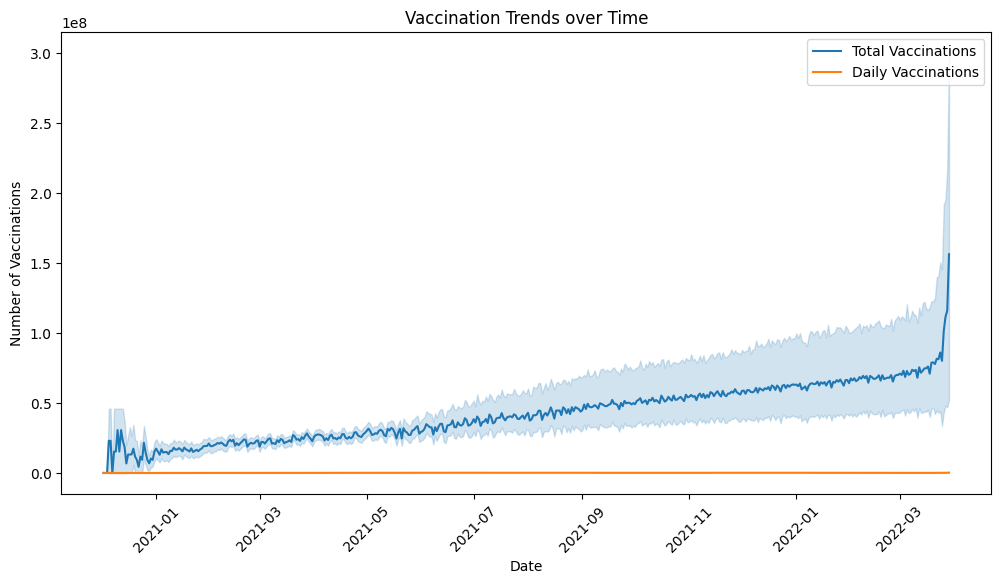

In [31]:
# Vaccination Trends over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='total_vaccinations', label='Total Vaccinations')
sns.lineplot(data=df, x='date', y='daily_vaccinations', label='Daily Vaccinations')
plt.xlabel('Date')
plt.ylabel('Number of Vaccinations')
plt.title('Vaccination Trends over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()

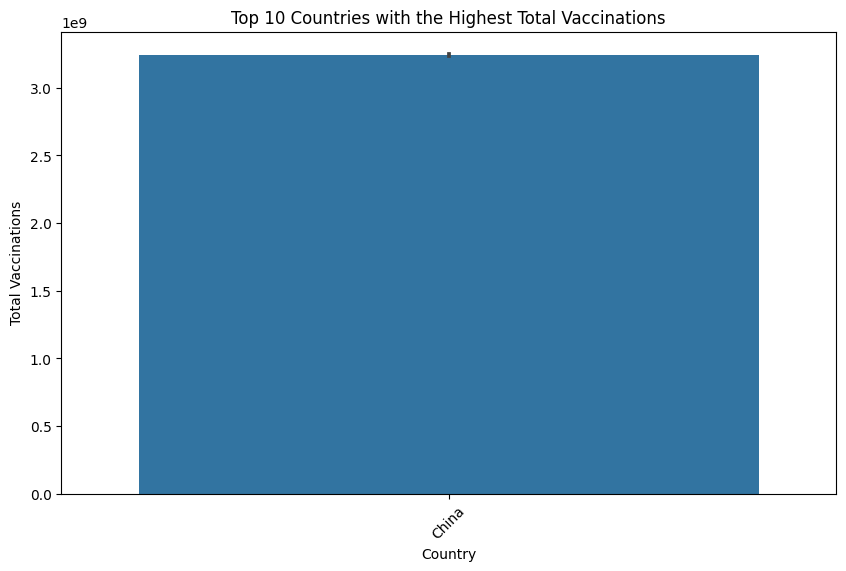

In [32]:
# Top-Performing Countries (Top 10 by Total Vaccinations)
top_countries = df.nlargest(10, 'total_vaccinations')
plt.figure(figsize=(10, 6))
sns.barplot(data=top_countries, x='country', y='total_vaccinations')
plt.xlabel('Country')
plt.ylabel('Total Vaccinations')
plt.title('Top 10 Countries with the Highest Total Vaccinations')
plt.xticks(rotation=45)
plt.show()

C:\Users\Syed Muqtasid Ali\AppData\Local\Temp\ipykernel_4724\647074677.py:12: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



<Figure size 1200x600 with 0 Axes>

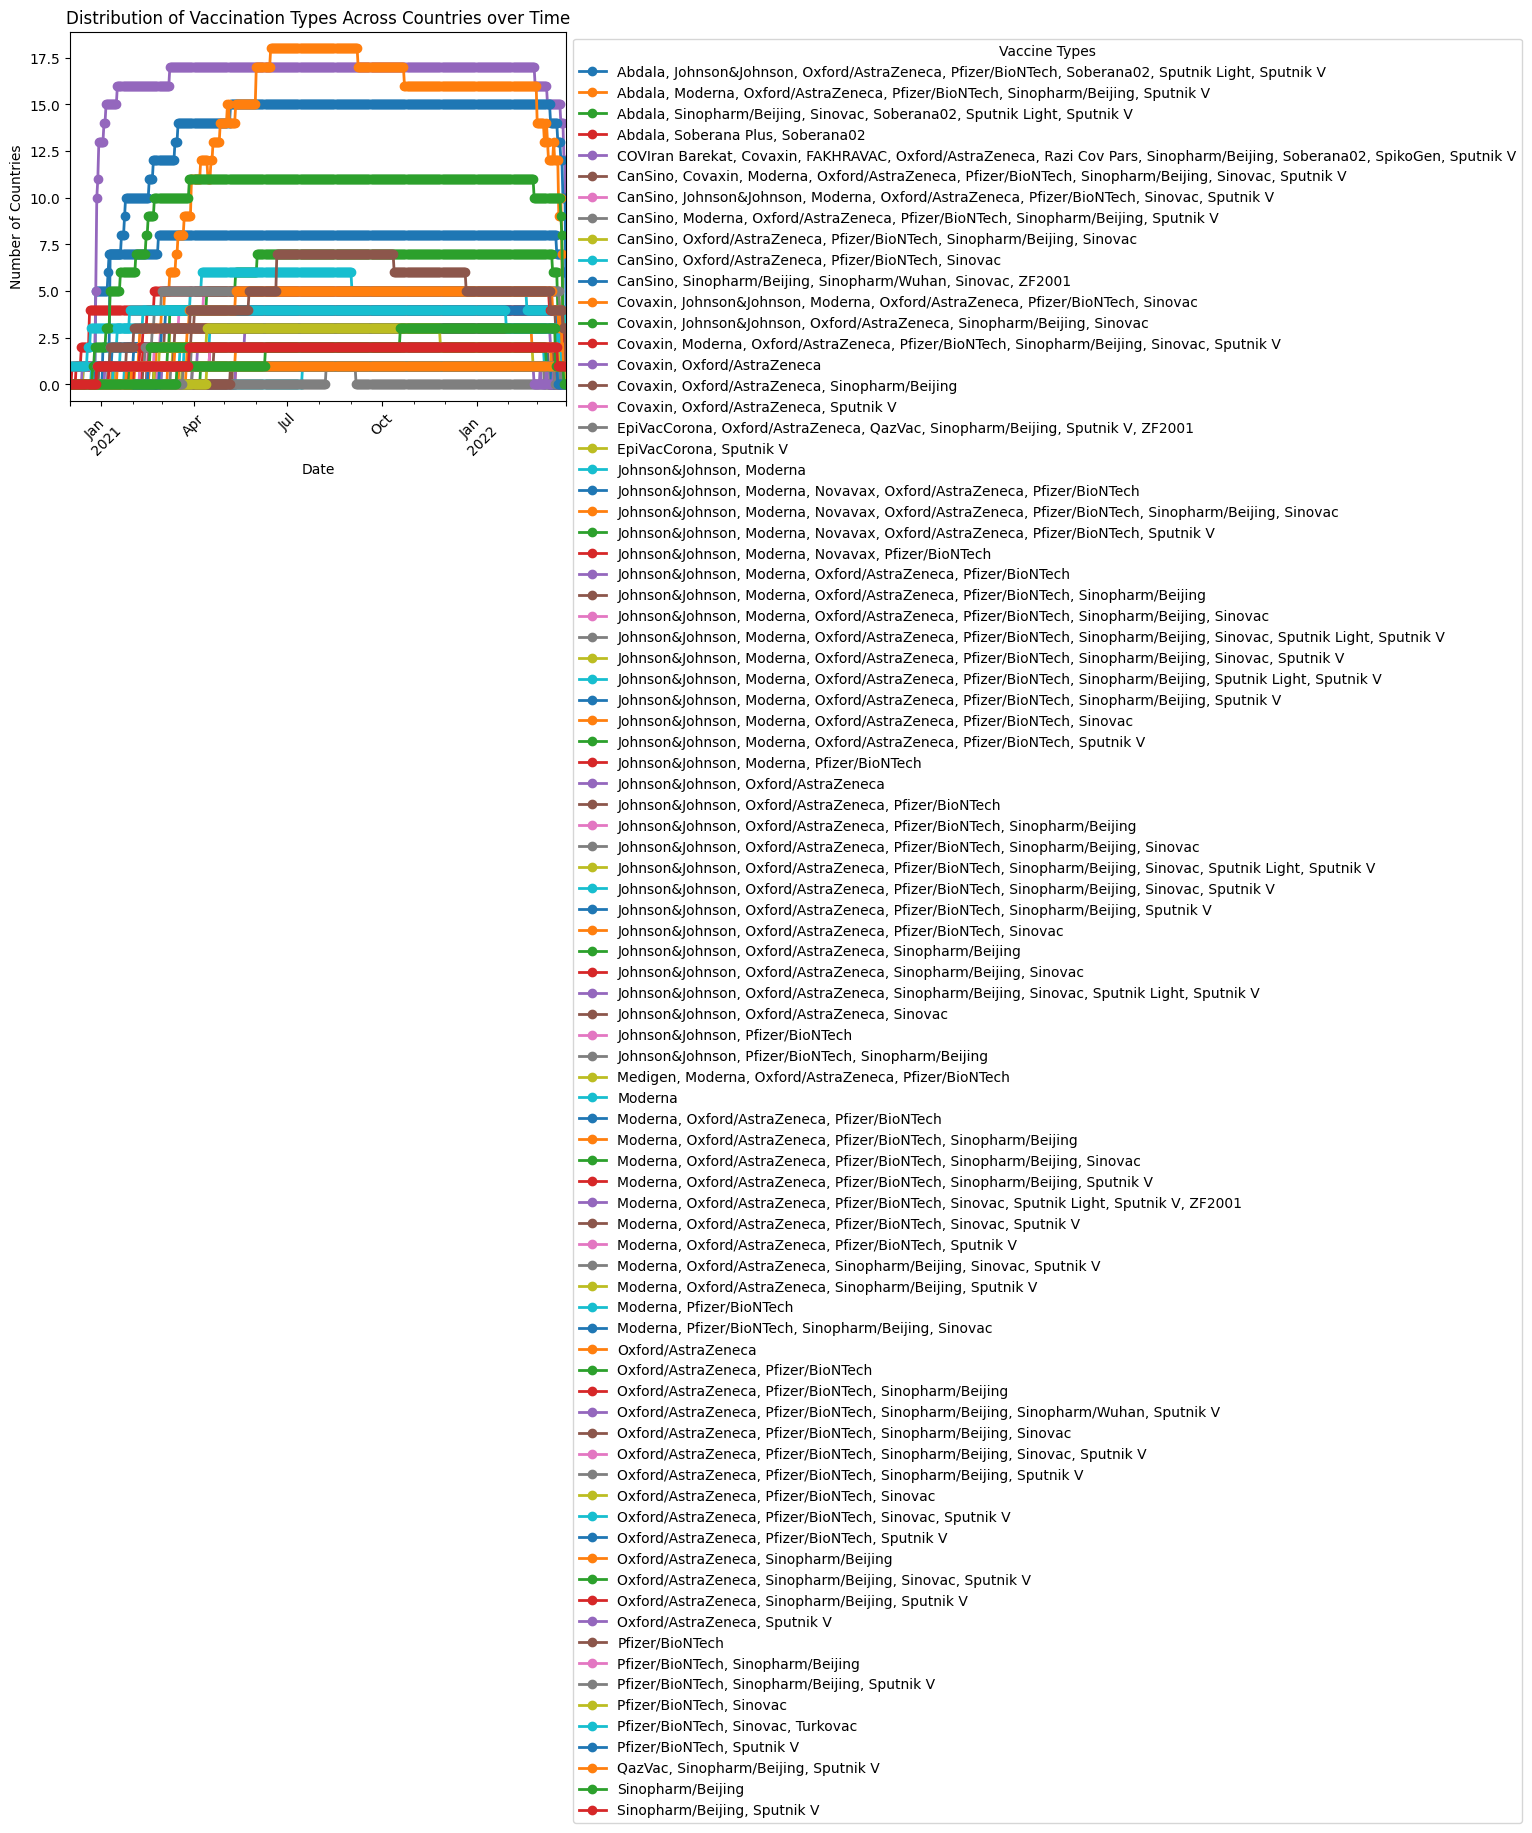

In [37]:
# Aggregating data to calculate the total number of countries using each vaccine type over time
vaccine_usage_over_time = df.groupby('date')['vaccines'].value_counts().unstack(fill_value=0)

# Line Plot for Vaccine Usage over Time
plt.figure(figsize=(12, 6))
vaccine_usage_over_time.plot(kind='line', marker='o', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Number of Countries')
plt.title('Distribution of Vaccination Types Across Countries over Time')
plt.legend(title='Vaccine Types', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

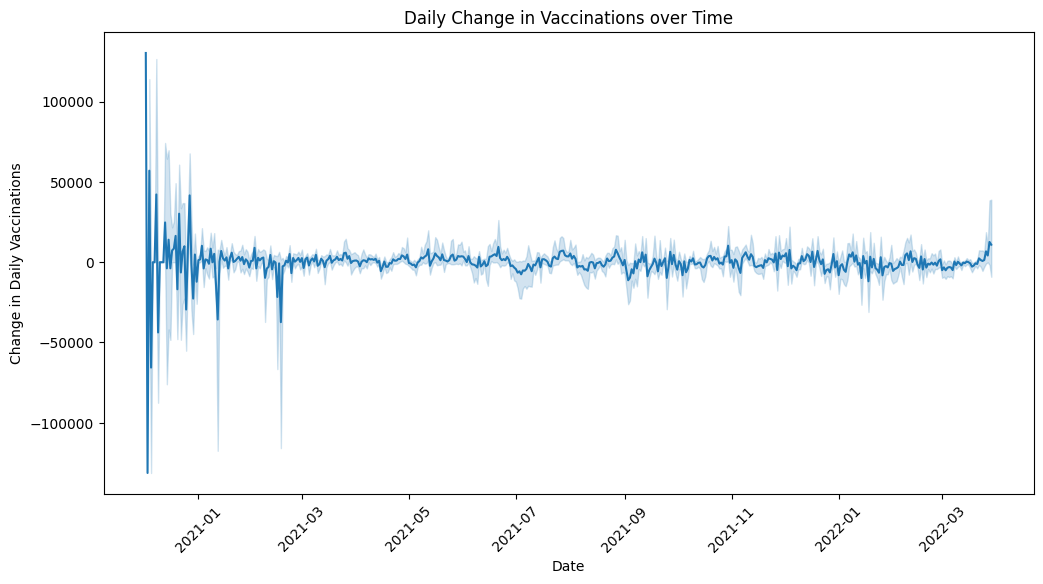

In [34]:
# Daily Vaccination Changes
df['daily_vaccinations_change'] = df['daily_vaccinations'].diff()
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='daily_vaccinations_change')
plt.xlabel('Date')
plt.ylabel('Change in Daily Vaccinations')
plt.title('Daily Change in Vaccinations over Time')
plt.xticks(rotation=45)
plt.show()

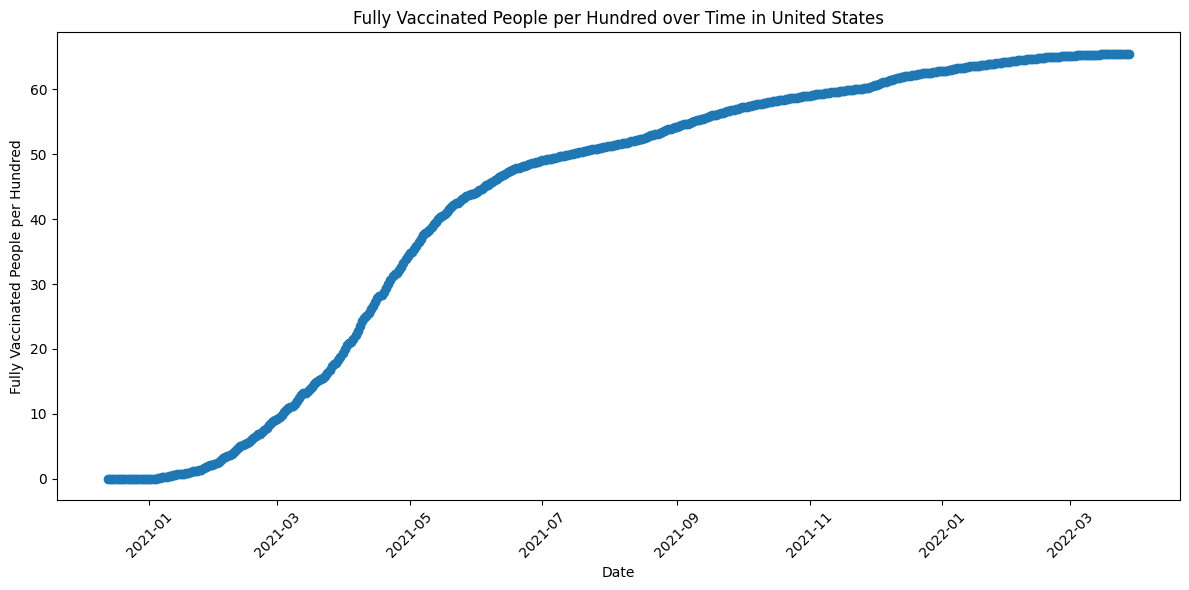

In [39]:
# Select a specific country for the line chart
selected_country = 'United States'  # Change this to the country of your choice

# Filter the data for the selected country
selected_country_df = df[df['country'] == selected_country]

# Line Chart for Fully Vaccinated People per Hundred over Time for the selected country
plt.figure(figsize=(12, 6))
plt.plot(selected_country_df['date'], selected_country_df['people_fully_vaccinated_per_hundred'], marker='o')
plt.xlabel('Date')
plt.ylabel('Fully Vaccinated People per Hundred')
plt.title(f'Fully Vaccinated People per Hundred over Time in {selected_country}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Utilize appropriate visualizations, area plots, or heatmaps, to represent the data effectively.

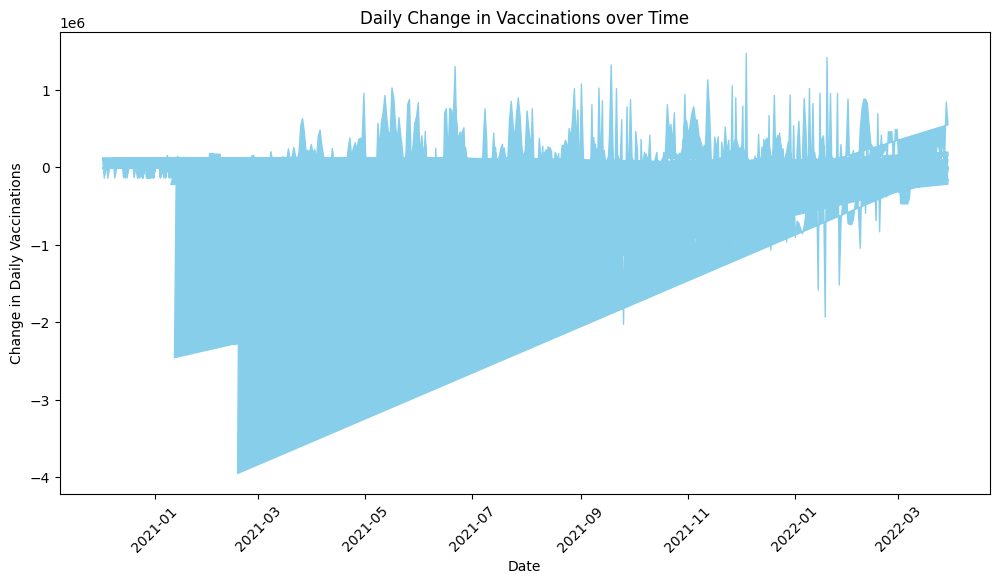

In [43]:
# Area Plot: Daily Vaccination Changes over Time
df['daily_vaccinations_change'] = df['daily_vaccinations'].diff()
plt.figure(figsize=(12, 6))
plt.fill_between(df['date'], df['daily_vaccinations_change'], color='skyblue')
plt.xlabel('Date')
plt.ylabel('Change in Daily Vaccinations')
plt.title('Daily Change in Vaccinations over Time')
plt.xticks(rotation=45)
plt.show()

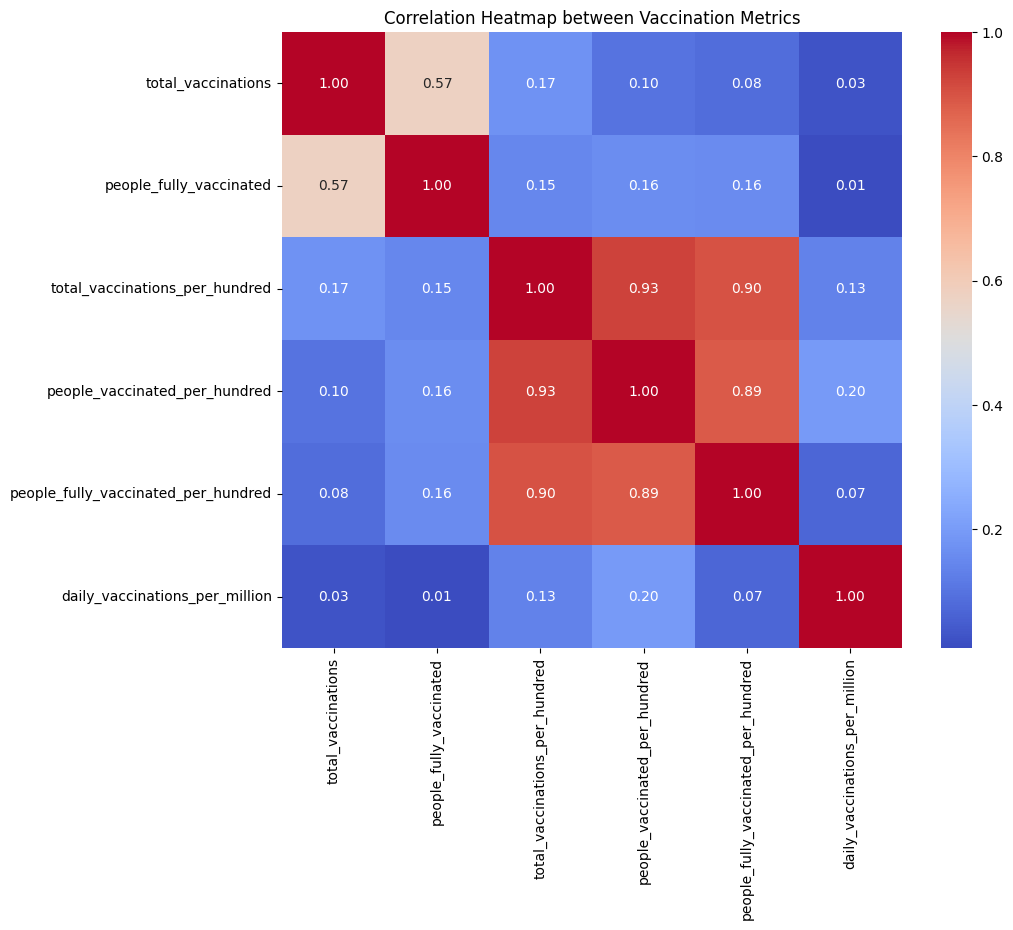

In [44]:
# Heatmap: Correlation between Vaccination Metrics
vaccination_metrics = df[['total_vaccinations', 'people_fully_vaccinated', 'total_vaccinations_per_hundred',
                         'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
                         'daily_vaccinations_per_million']]
correlation_matrix = vaccination_metrics.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Vaccination Metrics')
plt.show()

## Create time series plots to visualize the vaccination progress over time across different countries or regions.

In [45]:
# List of countries/regions you want to visualize (you can modify this list as needed)
countries_to_visualize = ['United States', 'India', 'Brazil', 'United Kingdom', 'Germany']


In [46]:
# Filter the data for the selected countries/regions
selected_countries_df = df[df['country'].isin(countries_to_visualize)]


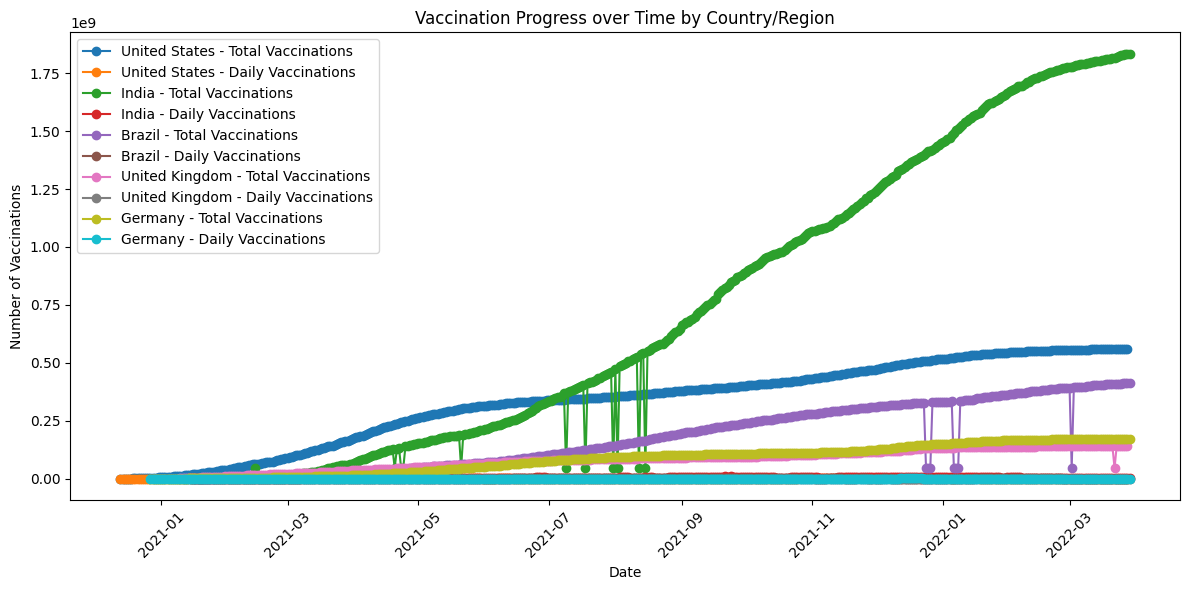

In [47]:
# Time Series Plots for Total Vaccinations and Daily Vaccinations
plt.figure(figsize=(12, 6))

for country in countries_to_visualize:
    country_df = selected_countries_df[selected_countries_df['country'] == country]
    plt.plot(country_df['date'], country_df['total_vaccinations'], label=country + ' - Total Vaccinations', marker='o')
    plt.plot(country_df['date'], country_df['daily_vaccinations'], label=country + ' - Daily Vaccinations', marker='o')

plt.xlabel('Date')
plt.ylabel('Number of Vaccinations')
plt.title('Vaccination Progress over Time by Country/Region')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Compare vaccination rates between countries using bar charts or stacked area plots.
# Method 1

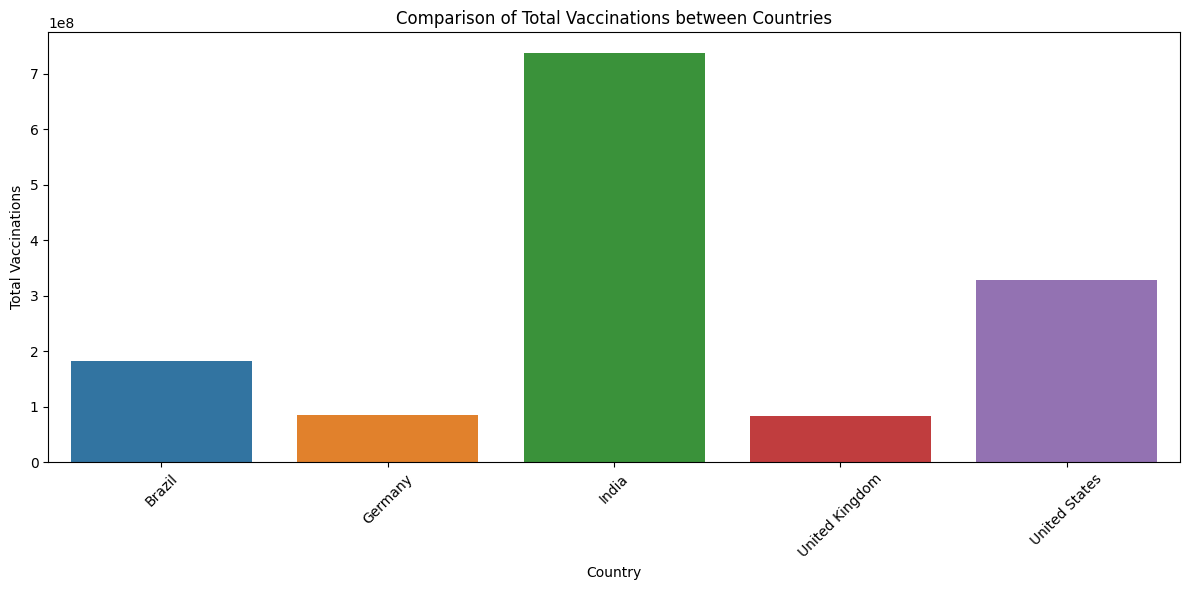

In [49]:
# Bar Chart for Total Vaccinations and People Fully Vaccinated per Hundred
plt.figure(figsize=(12, 6))

sns.barplot(data=selected_countries_df, x='country', y='total_vaccinations', errorbar=None)
plt.xlabel('Country')
plt.ylabel('Total Vaccinations')
plt.title('Comparison of Total Vaccinations between Countries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

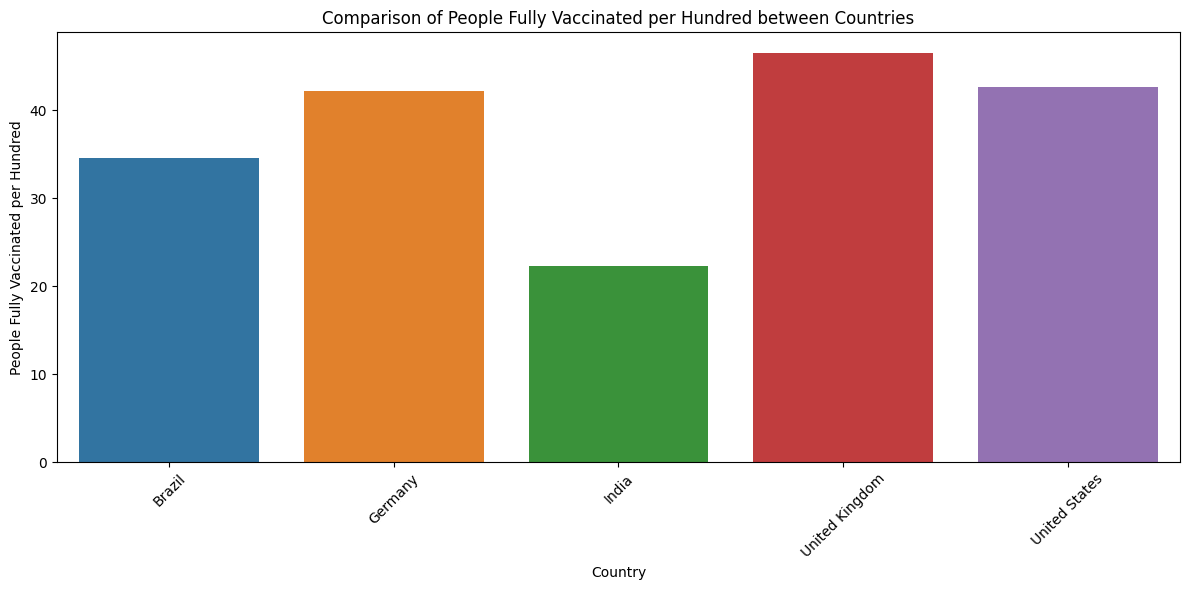

In [51]:
plt.figure(figsize=(12, 6))
sns.barplot(data=selected_countries_df, x='country', y='people_fully_vaccinated_per_hundred', errorbar=None)
plt.xlabel('Country')
plt.ylabel('People Fully Vaccinated per Hundred')
plt.title('Comparison of People Fully Vaccinated per Hundred between Countries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#  Method 2:

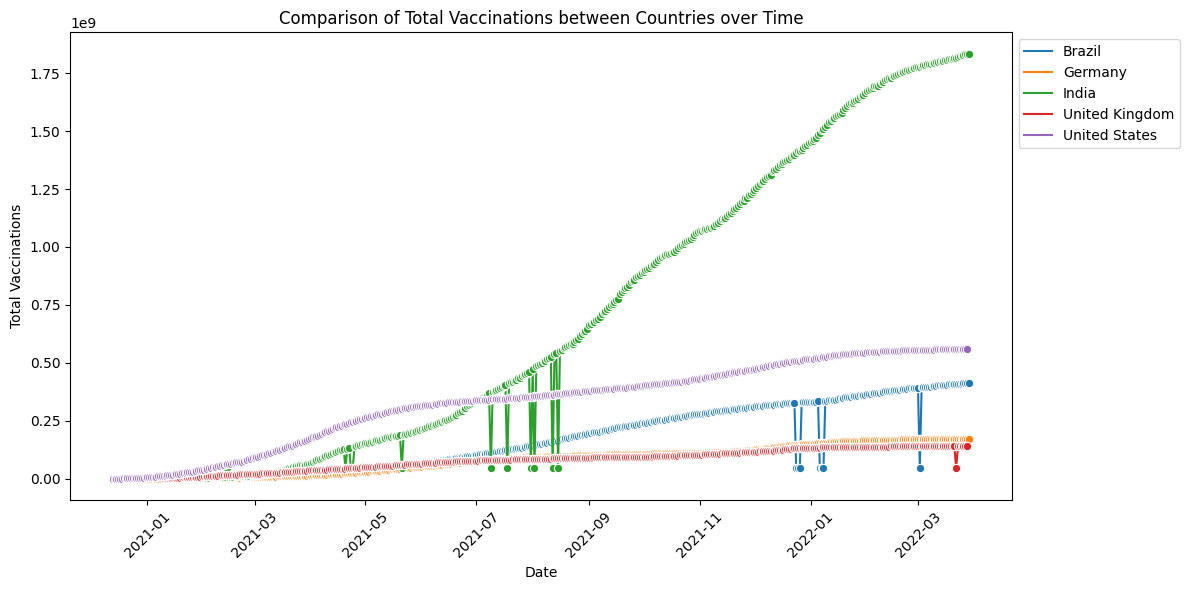

In [52]:
#Stacked Area Plot for Total Vaccinations and People Fully Vaccinated per Hundred
plt.figure(figsize=(12, 6))

sns.lineplot(data=selected_countries_df, x='date', y='total_vaccinations', hue='country', marker='o')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.title('Comparison of Total Vaccinations between Countries over Time')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

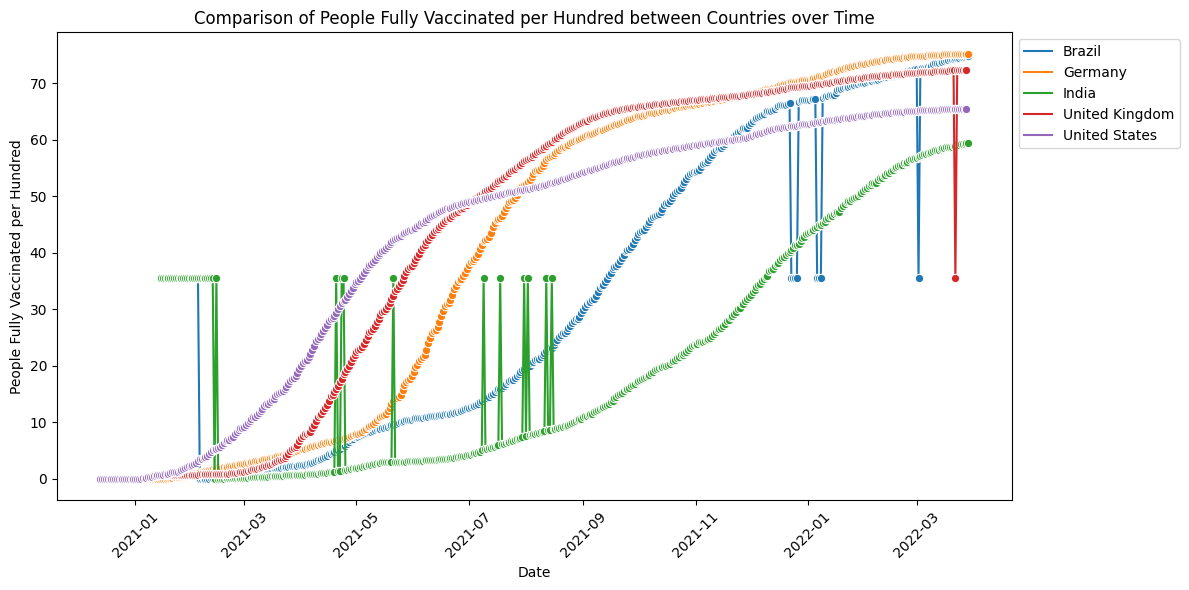

In [53]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=selected_countries_df, x='date', y='people_fully_vaccinated_per_hundred', hue='country', marker='o')
plt.xlabel('Date')
plt.ylabel('People Fully Vaccinated per Hundred')
plt.title('Comparison of People Fully Vaccinated per Hundred between Countries over Time')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analyze the distribution of vaccination types using pie charts or stacked bar charts.

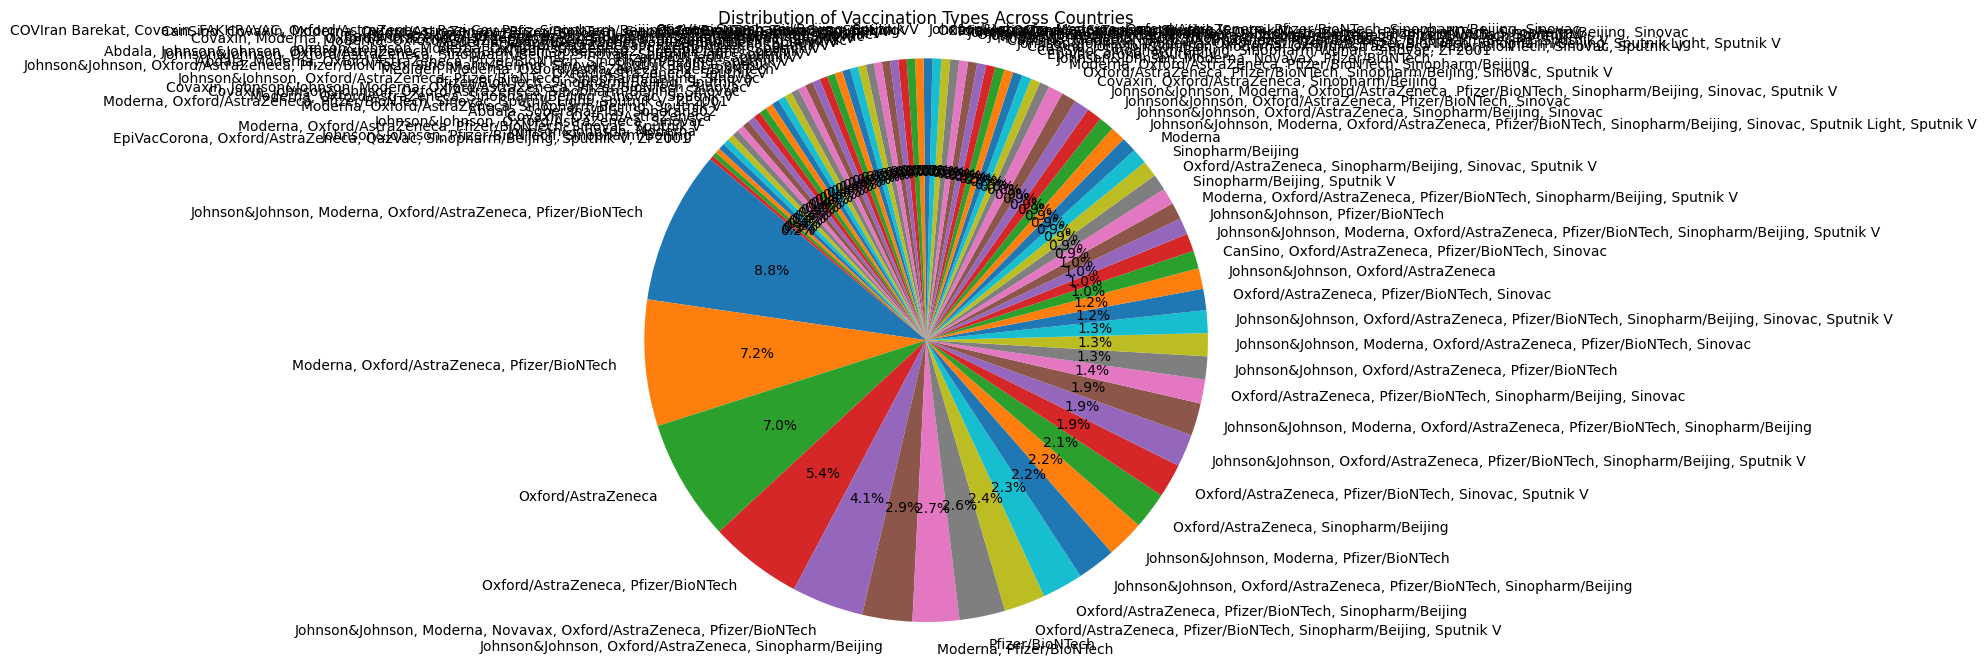

In [54]:
#  Pie Chart for Distribution of Vaccination Types
plt.figure(figsize=(8, 8))
plt.pie(vaccine_counts, labels=vaccine_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Vaccination Types Across Countries')
plt.show()

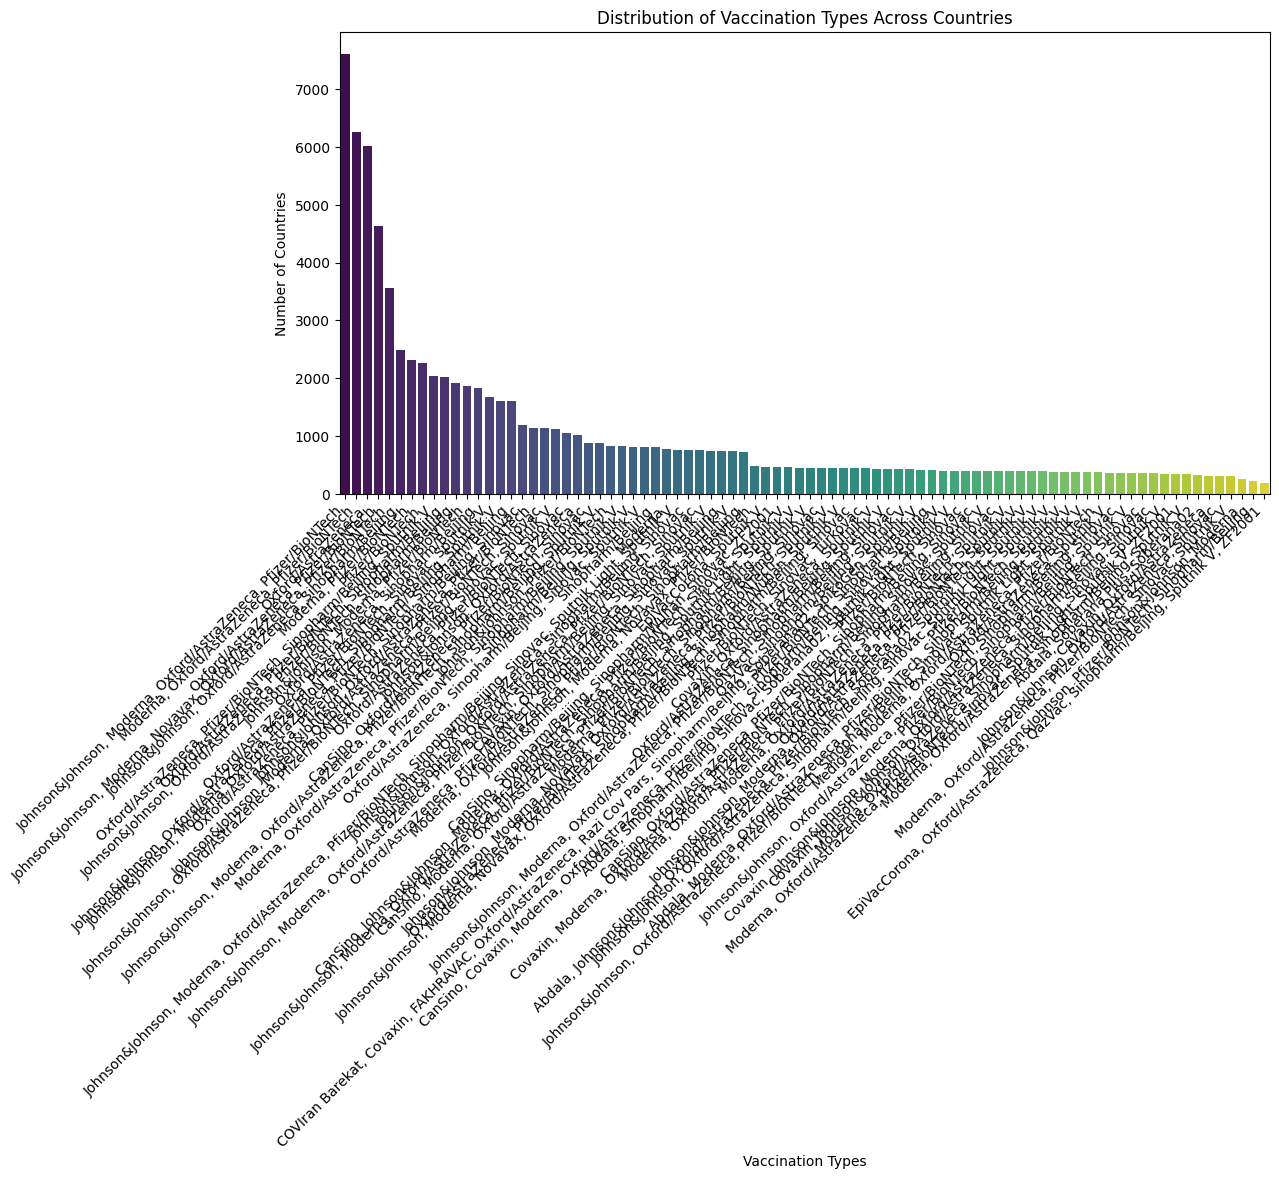

In [56]:
#  Stacked Bar Chart for Distribution of Vaccination Types
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='vaccines', order=vaccine_counts.index, palette='viridis')
plt.xlabel('Vaccination Types')
plt.ylabel('Number of Countries')
plt.title('Distribution of Vaccination Types Across Countries')
plt.xticks(rotation=45, ha='right')
plt.show()

# Vaccination Trends over Time:
The line plot showcasing total vaccinations and daily vaccinations over time indicates a significant increase in global vaccination efforts. There's a clear upward trend, demonstrating the progress made in vaccinating populations worldwide.

# Top-Performing Countries:
The bar chart identifies the top countries with the highest total vaccinations. It shows that some countries have made remarkable progress in administering vaccinations, leading the global effort.

# Vaccination Types Distribution:
The pie chart effectively displays the distribution of vaccination types across countries. It highlights which vaccines are being used more widely, and we can observe any regional preferences for specific vaccines.

# Daily Vaccination Changes:
The area plot reveals fluctuations in daily vaccinations over time. It can provide insights into vaccination campaigns' effectiveness and potential challenges faced in different periods.

# Vaccination Progress per Country:
The line plot for fully vaccinated people per hundred, showcased for specific countries, illustrates the proportion of the population that has been fully vaccinated over time. It enables a comparison of vaccination rates between different countries.